<a href="https://colab.research.google.com/github/KoraySali/Dissertation_Archive/blob/main/model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wildfire Image Detection Dissertation**

This file will include a number of important architectures, code and technologies. A Convolutional Neural Network (CNN) model will be used for the image detection of SMOKE, NO SMOKE, FIRE, NO FIRE classification.

A chosen methodology will be followed in order to prevent confusion when writting and coding this dissertation. Various evaluation metrics will be used to evaluate the outcome of the image detection model along with a number of visualisations for readability.

For copy/version issues a Github repository has been set up in order to retain versions and prevent loss of work.

The runtime of this file will be GPU as a CPU runtime took a lot longer to perform/execute our code.

In [1]:
!git clone https://github.com/KoraySali/Dissertation_Archive.git

Cloning into 'Dissertation_Archive'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 53 (delta 10), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (53/53), 2.09 MiB | 6.62 MiB/s, done.


## Linking our Google Drive to our ipynb file

An important step in this file is to link it to our Google Drive allowing for usability of the drive folder for uploading and downloading various files/folders.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


# import os
# os.chdir('/content/drive/My Drive/Dissertation')
# folder = os.path.join('/content/drive/Dissertation')
# !ls

Mounted at /content/drive
Dissertation_Wildfire_Detection.ipynb  main_dataset  test_big


## Importing our modules and libraries



In [ ]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os
import cv2
import matplotlib.image as mpimg
import random
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import shutil
from skimage import io, transform
import time
%matplotlib inline

In [ ]:
def select_images_in_folder(folder):
    all_images = os.listdir(folder)
    return all_images

preprocessed_train_fire_images = select_images_in_folder("/content/Dissertation_Archive/preprocessed_dataset/train_fire")
preprocessed_train_smoke_images = select_images_in_folder("/content/Dissertation_Archive/preprocessed_dataset/train_smoke")
preprocessed_train_nofire_nosmoke_images = select_images_in_folder("/content/Dissertation_Archive/preprocessed_dataset/train_nofire_nosmoke")

In [ ]:
from keras.utils import to_categorical

# Labeling the train_fire_images as class 0
train_fire_labels = [0 for i in range(len(preprocessed_train_fire_images))]

# Labeling the train_smoke_images as class 1
train_smoke_labels = [1 for i in range(len(preprocessed_train_smoke_images))]

# Labeling the train_nofire_nosmoke_images as class 2
train_nofire_nosmoke_labels = [2 for i in range(len(preprocessed_train_nofire_nosmoke_images))]

# One-hot encoding the labels
train_fire_labels = to_categorical(train_fire_labels, num_classes=3)
train_smoke_labels = to_categorical(train_smoke_labels, num_classes=3)
train_nofire_nosmoke_labels = to_categorical(train_nofire_nosmoke_labels, num_classes=3)

In [ ]:
train_smoke_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
# Combining the preprocessed images and their labels
X_train = np.concatenate([preprocessed_train_fire_images, preprocessed_train_smoke_images, preprocessed_train_nofire_nosmoke_images])
y_train = np.concatenate([train_fire_labels, train_smoke_labels, train_nofire_nosmoke_labels])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (120, 68, 68, 3)
Train labels shape:  (120, 3) float32
Test data shape:  (30, 68, 68, 3)
Test labels shape:  (30, 3)


In [ ]:
mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
X_train = (X_train - mean_pixel) / std_pixel
X_test = (X_test - mean_pixel) / std_pixel

In [ ]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (120, 68, 68, 3)
Train labels shape:  (120, 3) float32
Test data shape:  (30, 68, 68, 3)
Test labels shape:  (30, 3)


Label all images in the train folders

## Model Creation

In [ ]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, concatenate, Flatten, Dense, MaxPooling2D

# Define the inputs
inputs = Input(shape=(68, 68, 3))

# Define the first CNN model with dropout and batch normalization
x1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
x1 = Conv2D(32, (3,3), activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

# Define the second CNN model with dropout and batch normalization
x2 = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)
x2 = Conv2D(64, (3,3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

# Define the third CNN model with dropout and batch normalization
x3 = Conv2D(128, (3,3), activation='relu', padding='same')(inputs)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.2)(x3)
x3 = Conv2D(128, (3,3), activation='relu', padding='same')(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.2)(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)

# Concatenate the outputs of the CNN models
x = concatenate([x1, x2, x3])

# Flatten the output and add a dense layer for classification
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
test_base = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 17s 780ms/step - loss: 116.2412 - accuracy: 0.4750 - val_loss: 3.3046 - val_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 0s 117ms/step - loss: 67.0048 - accuracy: 0.7250 - val_loss: 1.9769 - val_accuracy: 0.8333
Epoch 3/10
4/4 [==============================] - 0s 111ms/step - loss: 30.1324 - accuracy: 0.7917 - val_loss: 5.0216 - val_accuracy: 0.8000
Epoch 4/10
4/4 [==============================] - 0s 110ms/step - loss: 17.8288 - accuracy: 0.8417 - val_loss: 6.7052 - val_accuracy: 0.7333
Epoch 5/10
4/4 [==============================] - 0s 110ms/step - loss: 9.7634 - accuracy: 0.8667 - val_loss: 12.9080 - val_accuracy: 0.7333
Epoch 6/10
4/4 [==============================] - 0s 108ms/step - loss: 3.1222 - accuracy: 0.9083 - val_loss: 21.9604 - val_accuracy: 0.7000
Epoch 7/10
4/4 [==============================] - 0s 109ms/step - loss: 4.4201 - accuracy: 0.9083 - val_loss: 30.3367 - val_accuracy: 0.6667
Epoch 8/10


In [ ]:
base_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[68,68,3]),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
base_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_base = base_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 2s 178ms/step - loss: 2.1850 - accuracy: 0.2917 - val_loss: 1.1120 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 23ms/step - loss: 0.9958 - accuracy: 0.6250 - val_loss: 0.6365 - val_accuracy: 0.7333
Epoch 3/10
4/4 [==============================] - 0s 38ms/step - loss: 0.7033 - accuracy: 0.7000 - val_loss: 0.5954 - val_accuracy: 0.8333
Epoch 4/10
4/4 [==============================] - 0s 28ms/step - loss: 0.6057 - accuracy: 0.7250 - val_loss: 0.4428 - val_accuracy: 0.8333
Epoch 5/10
4/4 [==============================] - 0s 37ms/step - loss: 0.4886 - accuracy: 0.8083 - val_loss: 0.4367 - val_accuracy: 0.7667
Epoch 6/10
4/4 [==============================] - 0s 34ms/step - loss: 0.4295 - accuracy: 0.8500 - val_loss: 0.3776 - val_accuracy: 0.7667
Epoch 7/10
4/4 [==============================] - 0s 45ms/step - loss: 0.3154 - accuracy: 0.8750 - val_loss: 0.3252 - val_accuracy: 0.8667
Epoch 8/10
4/4 [==========

## Model Performance Analysis

In [ ]:
class_names = ['fire', 'smoke', 'no_fire_no_smoke']

In [ ]:
predicted_classes  = np.argmax(base_model.predict(X_test.reshape(-1,68,68,3)), axis=-1)
y_true=y_test

1/1 [==============================] - 0s 93ms/step


In [ ]:
y_true = np.argmax(y_test, axis=-1)
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 26
Incorrect predicted classes: 4


## Plotting the train and test imagery

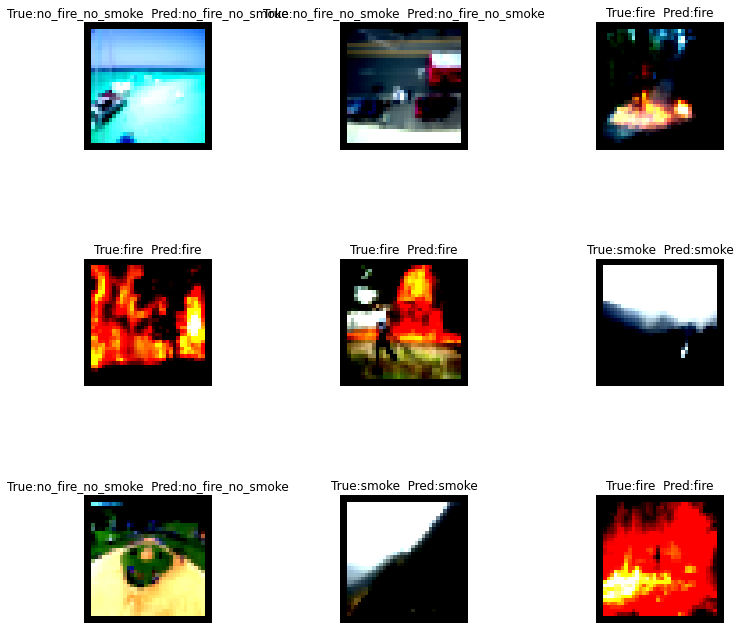

In [ ]:
def plot_images(data_index):
    f, ax = plt.subplots(3, 3, figsize=(10,10))

    for i, indx in enumerate(data_index[:9]):
        ax[i//3, i%3].imshow(X_test[indx].reshape(68, 68, 3), cmap='gray')
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title("True:{}  Pred:{}".format(class_names[y_true[indx]], class_names[predicted_classes[indx]]))
    f.tight_layout()
    plt.show()   

plot_images(correct)

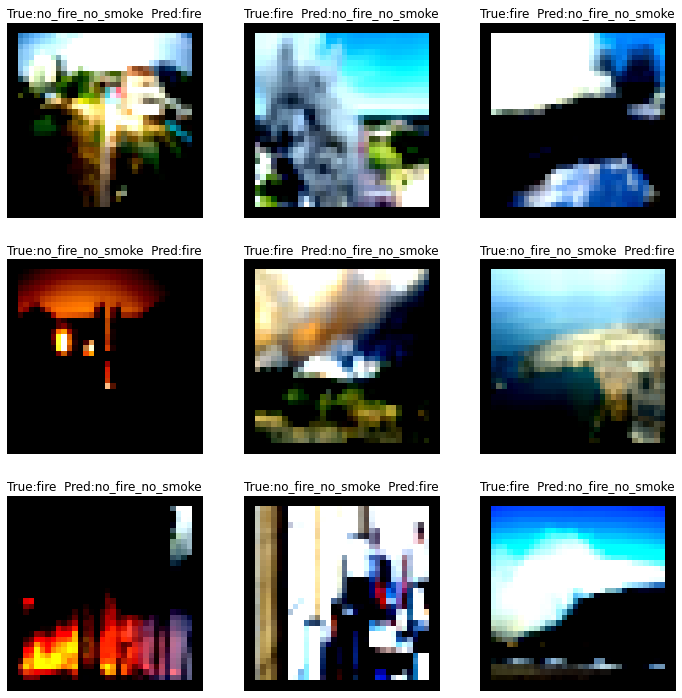

In [ ]:
plot_images(incorrect)